In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

In [64]:
# Read the file
file_path = "ADANIPORTS.csv"
df = pd.read_csv(file_path)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942


<Axes: >

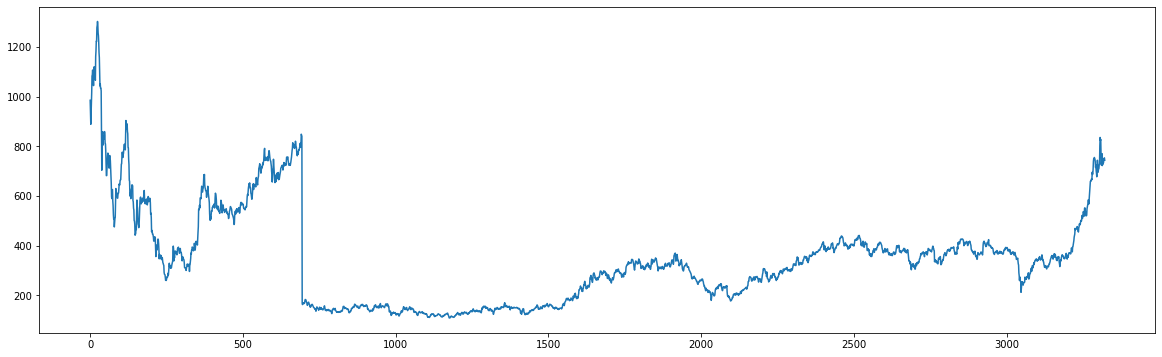

In [65]:
df["VWAP"].plot(figsize=(20, 6))

In [66]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High',]

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High
0,0.550634,0.774216
1,0.728634,0.724774
2,0.666251,0.662766
3,0.650447,0.698406
4,0.691828,0.728895


In [68]:
feature_transform.shape

(3322, 2)

In [69]:
# timeseries split is used to split the data in time series format when we are dealing with time series data
from sklearn.model_selection import TimeSeriesSplit 
#Splitting to Training set and Test set in 80:20 ratio
timesplit= TimeSeriesSplit(n_splits=5)
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[train_index], feature_transform.iloc[test_index]
    y_train, y_test = output_var.iloc[train_index], output_var.iloc[test_index]

print(X_train.shape)
print(X_test.shape)

#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape)
print(X_test.shape)
# the (3020, 1 , 4) means 3020 rows, 1 column and 4 features

(2769, 2)
(553, 2)
(2769, 1, 2)
(553, 1, 2)


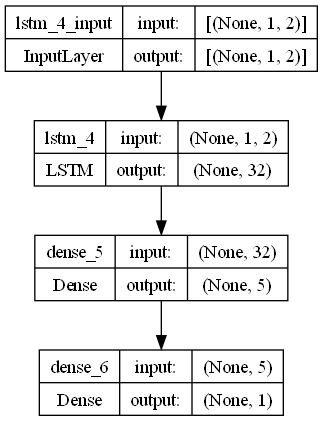

In [70]:
#Building the LSTM Model
import tensorflow as tf
lstm = tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(tf.keras.layers.Dense(5, activation='relu'))
lstm.add(tf.keras.layers.Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(lstm, show_shapes=True, show_layer_names=True)

In [71]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1, shuffle=False)

Epoch 1/50
347/347 [==============================] - 3s 2ms/step - loss: 150954.6250
Epoch 2/50
347/347 [==============================] - 1s 2ms/step - loss: 143902.6406
Epoch 3/50
347/347 [==============================] - 1s 2ms/step - loss: 116579.4922
Epoch 4/50
347/347 [==============================] - 1s 2ms/step - loss: 72185.7031
Epoch 5/50
347/347 [==============================] - 1s 2ms/step - loss: 36469.6328
Epoch 6/50
347/347 [==============================] - 1s 2ms/step - loss: 20555.9746
Epoch 7/50
347/347 [==============================] - 1s 2ms/step - loss: 15232.8691
Epoch 8/50
347/347 [==============================] - 1s 2ms/step - loss: 12784.8408
Epoch 9/50
347/347 [==============================] - 1s 2ms/step - loss: 10942.8174
Epoch 10/50
347/347 [==============================] - 1s 2ms/step - loss: 9252.4521
Epoch 11/50
347/347 [==============================] - 1s 2ms/step - loss: 7640.0200
Epoch 12/50
347/347 [==============================] - 1s 2ms/

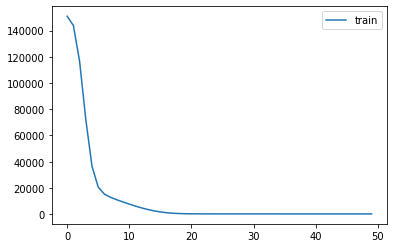

In [72]:
# visualize the loss
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [73]:
#LSTM Model metrics
y_pred = lstm.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('LSTM Model metrics')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))


18/18 [==============================] - 0s 1ms/step
LSTM Model metrics
Mean Squared Error: 73.91126758206872
Mean Absolute Error: 5.609647969527011
R2 Score: 0.9945068414961633


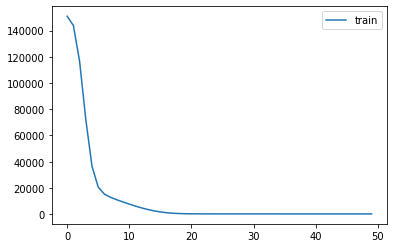

In [78]:
# visualize the loss
plt.plot(history.history['loss'], label='train')
plt.legend()

87/87 [==============================] - 0s 1ms/step


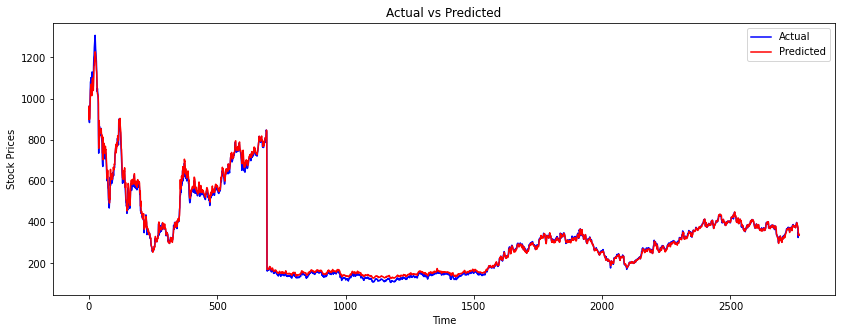

In [79]:
# Visualising of the results
y_train_pred = lstm.predict(X_train)
plt.figure(figsize=(14,5))
plt.plot(y_train.values, color='blue', label='Actual')
plt.plot(y_train_pred , color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


 1/18 [>.............................] - ETA: 0s

18/18 [==============================] - 0s 1ms/step


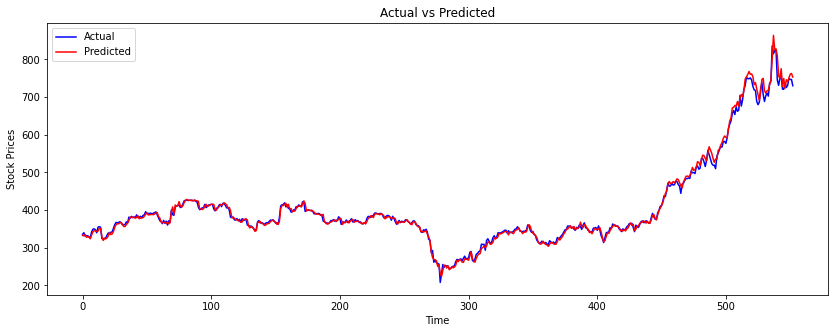

In [80]:
#Visualize the Predictions
y_test_pred = lstm.predict(X_test)
plt.figure(figsize=(14,5))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_test_pred , color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()

3/3 [==============================] - 0s 3ms/step
last value of actual        Close
3321  730.05


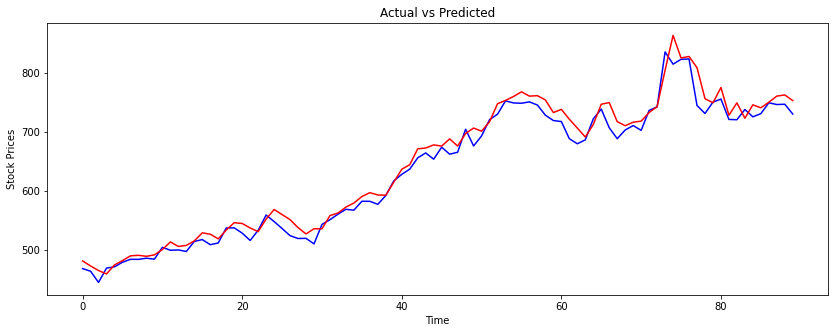

In [91]:
# last xx days actual
n_future=90
forecast = lstm.predict(X_test[-n_future:]) #forecast
# visualize the predictions
plt.figure(figsize=(14,5))
plt.plot(y_test[-n_future:].values, color='blue', label='Actual')
plt.plot(forecast , color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Prices')